In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from viewer import *
from utils import *

In [3]:
path_events = 'SauronData/'
df = pd.read_excel('tables/batch1.xlsx')
df = df.rename({'file':'HashFolderName'},axis=1)
list_events = [df.HashFolderName.iloc[i].split('_')[0]+'_'+datetime.strftime(df.time.iloc[i],'%Y%m%d_%H%M%S') for i in range(len(df))]

In [10]:
storage_channels = ['Fp1','F3','C3','P3','F7','T3','T5','O1','Fz','Cz','Pz','Fp2','F4','C4','P4','F8','T4','T6','O2']
montage_channels = ['Fp1','F3','C3','P3','F7','T3','T5','O1','Fz','Cz','Pz','Fp2','F4','C4','P4','F8','T4','T6','O2']
views = {'allChannels':montage_channels}


In [11]:
x_start = 0
x_end = 10
Fq = 128
i = 0
y_locations =[-100*(i) for i in range(9)]+[-100*(i) for i in range(10,13)]+[-100*(i) for i in range(14,21)]
channel_locations = y_locations
y_labels = montage_channels

In [12]:
montage = build_montage(montage_channels=montage_channels,storage_channels=storage_channels)

storage channels: ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2']
montage channels: ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2']


In [13]:
class init_title_loader_SauronEvent():
    def __init__(self,HashFolderNames,Classes,Annotations):
        self.HashFolderNames = HashFolderNames
        self.Classes = Classes
        self.Annotations = Annotations
        self.idx = -1

    def __call__(self):
        idx = self.idx
        title = 'HashFoldername: '+self.HashFolderNames[idx]+'\n Classes: '+self.Classes[idx]+'\n Annotations: '+self.Annotations[idx]+'\n'
        return title

In [14]:
action_list = {
    'right': lambda: change_event_and_title(viewer_module,event_loader,title_loader,montage_module,increment=1),
    'left': lambda: change_event_and_title(viewer_module,event_loader,title_loader,montage_module,increment=-1)
   # More entries...
}
def action_function(event,action_list, event_loader, montage_applier, title_loader, viewer_module):
    action = action_list.get(event.key)
    action()

In [16]:
df_og['class'].unique()

NameError: name 'df_og' is not defined

In [17]:
df_og = pd.read_excel('tables/batch1.xlsx')[:30]

In [18]:
path_events = 'SauronData/'
df = df_og.copy()
df=df[df['class']=='sleep']
df = df.rename({'file':'HashFolderName'},axis=1)
list_events = [df.HashFolderName.iloc[i].split('_')[0]+'_'+datetime.strftime(df.time.iloc[i],'%Y%m%d_%H%M%S') for i in range(len(df))]

the following views are available: dict_keys(['allChannels'])


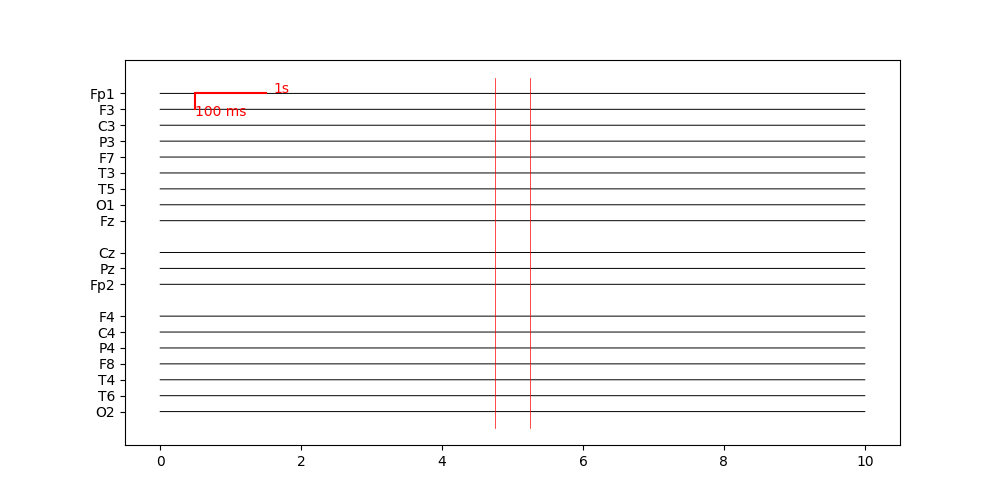

IndexError: list index out of range

In [19]:
title_loader = init_title_loader_SauronEvent(HashFolderNames=df.HashFolderName.to_list(),Classes=df['class'].to_list(),Annotations=df.annotation.to_list())
montage_module = init_montage_class(view='allChannels',views_list=views,storage_channels=storage_channels,montage_channels=montage_channels,montage=montage)
# transform_module = init_transforms(transforms={'montage':montage_class})
event_loader= init_event_loader(path_events,list_events, signal_start = 2.5, signal_end = 12.5,Fq=200)
viewer_module = init_viewer_module(x_start=0,x_end=10,y_labels=y_labels,Fq=200,y_locations=channel_locations,figsize=(10,5))
# update_to_next_event(event_loader,channel_lines,y_locations)
viewer_module.fig.canvas.mpl_connect('key_press_event', lambda event: action_function(event,action_list, event_loader, montage_module, title_loader, viewer_module))
plt.show()

In [ ]:
import os
np.load('test/'+list_events[0]+'.npy')

array([[ -98.36031398,  -79.21992856,  -74.16899351, ...,  -51.57270517,
         -31.10312631,  -34.29319055],
       [ -49.97767305,  -43.33170589,  -38.54660953, ...,  -22.06461097,
         -15.6844825 ,  -14.62112775],
       [ -57.42115627, -100.22118478,  -94.63857237, ...,  -23.12796572,
         -72.04228402,  -55.56028546],
       ...,
       [ -80.54912199,  -87.72676652,  -71.51060665, ...,  -43.0658672 ,
         -46.52177012,  -39.87580296],
       [ 206.55665935,  192.99888635,  199.91069219, ...,  196.45478927,
         183.16285495,  190.87217686],
       [-521.30966408, -524.76556701, -519.44879328, ..., -354.89464638,
        -358.3505493 , -351.97042083]])

In [ ]:
action_list['right']()